In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [180]:
data = pd.read_csv("Data5.csv")  # Ganti dengan nama file data Anda
data.head()


,Bahan1,Bahan2,Bahan3,Bahan4,Bahan5,Bahan6,Bahan7,Bahan8,Bahan9,KelayakanHalal
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0,1


In [181]:
X = data.iloc[:, :-1]  # Features
Y = data.iloc[:, -1]   # Labels

In [182]:
data.shape

(119, 10)

In [183]:
data['KelayakanHalal'].value_counts()
X = data.drop (columns='KelayakanHalal',axis=1)
Y = data['KelayakanHalal']

In [184]:
print(X)

     Bahan1  Bahan2  Bahan3  Bahan4  Bahan5  Bahan6  Bahan7  Bahan8  Bahan9
0         0       0       0       0       0       0       0       0       0
1         0       0       0       0       0       0       0       0       0
2         0       0       0       0       2       0       0       0       0
3         0       0       0       0       0       0       0       0       0
4         0       0       0       2       0       0       0       0       0
..      ...     ...     ...     ...     ...     ...     ...     ...     ...
114       0       0       0       0       0       0       0       0       1
115       0       0       0       0       0       0       0       0       0
116       0       0       0       0       0       0       0       0       0
117       0       0       0       0       0       0       0       0       1
118       0       0       0       2       0       0       0       0       1

[119 rows x 9 columns]


In [185]:
print(Y)

0      0
1      0
2      1
3      0
4      1
      ..
114    0
115    0
116    0
117    0
118    1
Name: KelayakanHalal, Length: 119, dtype: int64


In [186]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [187]:
standarized_data = scaler.transform(X)
print(standarized_data)

[[ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
  -0.36861731]
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
  -0.36861731]
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
  -0.36861731]
 ...
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
  -0.36861731]
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
   1.62526722]
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
   1.62526722]]


In [188]:
X = standarized_data
Y = data['KelayakanHalal']

In [189]:
print(X)

[[ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
  -0.36861731]
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
  -0.36861731]
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
  -0.36861731]
 ...
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
  -0.36861731]
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
   1.62526722]
 [ 0.          0.         -0.09205746 ... -0.34620993 -0.54105333
   1.62526722]]


In [190]:
print(Y)

0      0
1      0
2      1
3      0
4      1
      ..
114    0
115    0
116    0
117    0
118    1
Name: KelayakanHalal, Length: 119, dtype: int64


In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [192]:
nb_classifier = GaussianNB()

In [193]:
nb_classifier.fit(X_train, Y_train)


GaussianNB()

In [194]:
X_train_prediction = nb_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [195]:
print("Accuracy training:", training_data_accuracy)

Accuracy training: 0.9789473684210527


In [196]:
X = data.iloc[:, :-1]  # Features
Y = data.iloc[:, -1]   # Labels

In [197]:
X_test_prediction = nb_classifier.predict(X_test)

In [198]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [199]:
y_pred = nb_classifier.predict(X_test)

In [200]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


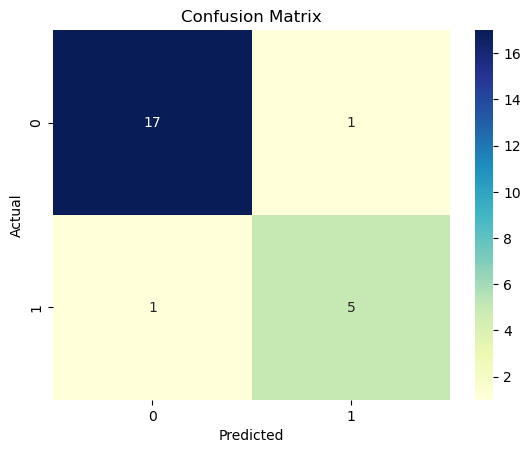

In [201]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=["Actual"], colnames=["Predicted"])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

In [202]:
filename = 'nb_classifier.sav'
pickle.dump(nb_classifier, open(filename, 'wb'))